<a href="https://colab.research.google.com/github/AnshUpadhyay639/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import math #use for mathematical operations
import numpy as np #use for operation in array
import pandas as pd #use to manipulated numerical data and time series
from sklearn.preprocessing import MinMaxScaler #use to scale values to a specified range
from keras.models import Sequential #sequentially arrange stack of layers
from keras.layers import Dense, LSTM #use for neural networks
import matplotlib.pyplot as plt #used for plotting graphs

In [97]:
import kagglehub
import os
# Download Dataset
path = kagglehub.dataset_download("khoongweihao/aaplcsv")
# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

print("Path to dataset files:", csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/khoongweihao/aaplcsv/versions/1/AAPL.csv


In [74]:
df=pd.read_csv(csv_file_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


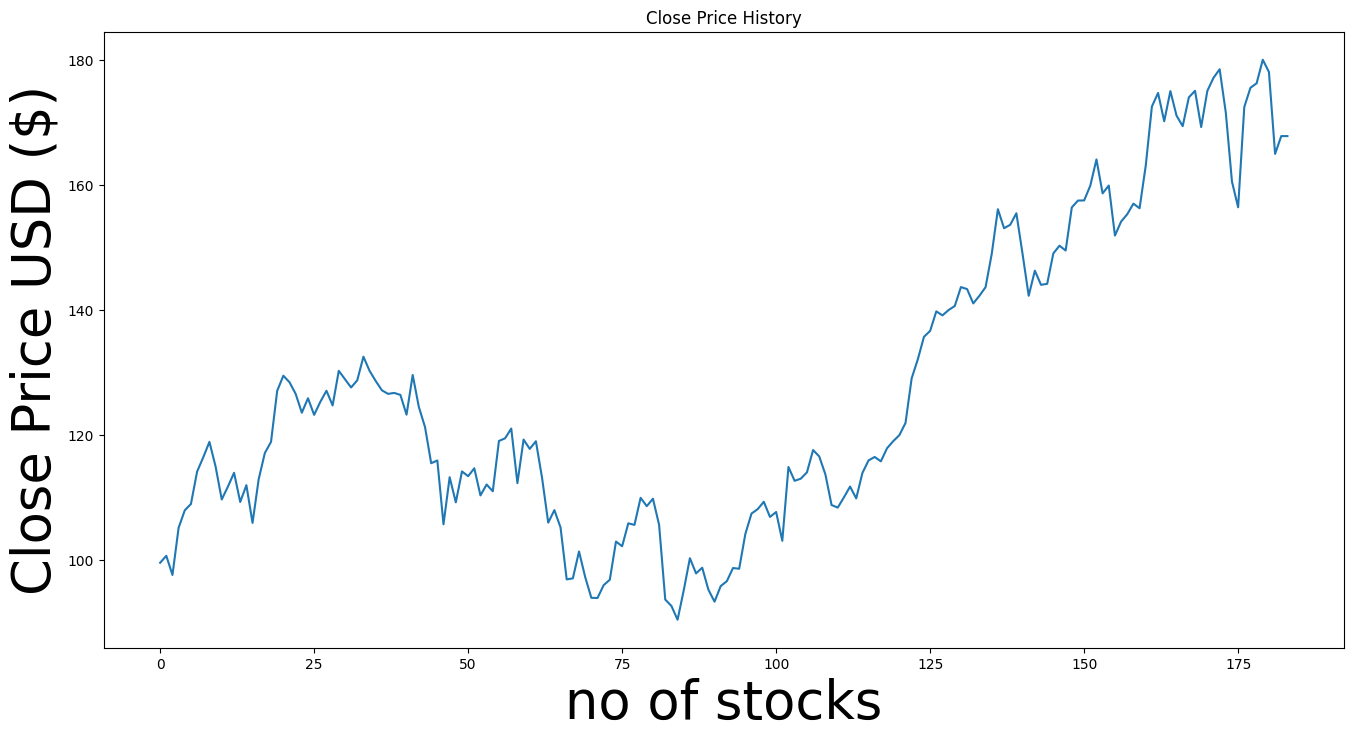

In [75]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('no of stocks',fontsize=38)
plt.ylabel('Close Price USD ($)',fontsize=38)
plt.show()

In [76]:
#creating a new dataframe with only the close column
data=df.filter(['Close'])
#converting the dataframe to a numpy array
dataset=data.values
#getting the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

148

In [77]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.10172151],
       [0.11412929],
       [0.079924  ],
       [0.1643193 ],
       [0.19539463],
       [0.20668461],
       [0.26447578],
       [0.29007382],
       [0.31757214],
       [0.27364189],
       [0.21473291],
       [0.23764814],
       [0.2623519 ],
       [0.21026163],
       [0.24021915],
       [0.17292646],
       [0.251062  ],
       [0.2977868 ],
       [0.31757214],
       [0.40867433],
       [0.4357255 ],
       [0.42410027],
       [0.40330876],
       [0.36966241],
       [0.39548408],
       [0.36586188],
       [0.38900071],
       [0.40889785],
       [0.38262915],
       [0.44444447],
       [0.42957747],
       [0.41471056],
       [0.42756548],
       [0.46970709],
       [0.44444447],
       [0.42622398],
       [0.40968032],
       [0.40330876],
       [0.40498551],
       [0.40152029],
       [0.36619721],
       [0.43706683],
       [0.3798346 ],
       [0.34406446],
       [0.27945451],
       [0.28437293],
       [0.17035552],
       [0.254

In [78]:
#create the training data set
#create teh scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.10172151, 0.11412929, 0.079924  , 0.1643193 , 0.19539463,
       0.20668461, 0.26447578, 0.29007382, 0.31757214, 0.27364189,
       0.21473291, 0.23764814, 0.2623519 , 0.21026163, 0.24021915,
       0.17292646, 0.251062  , 0.2977868 , 0.31757214, 0.40867433,
       0.4357255 , 0.42410027, 0.40330876, 0.36966241, 0.39548408,
       0.36586188, 0.38900071, 0.40889785, 0.38262915, 0.44444447,
       0.42957747, 0.41471056, 0.42756548, 0.46970709, 0.44444447,
       0.42622398, 0.40968032, 0.40330876, 0.40498551, 0.40152029,
       0.36619721, 0.43706683, 0.3798346 , 0.34406446, 0.27945451,
       0.28437293, 0.17035552, 0.25452721, 0.20959088, 0.26481111,
       0.25631567, 0.2704002 , 0.22199866, 0.24144876, 0.2293763 ,
       0.31924889, 0.3239437 , 0.34138164, 0.24390788, 0.3217081 ])]
[0.305052552035016]



In [79]:
#converting the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [80]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(88, 60, 1)

In [81]:
x_train

array([[[0.10172151],
        [0.11412929],
        [0.079924  ],
        ...,
        [0.34138164],
        [0.24390788],
        [0.3217081 ]],

       [[0.11412929],
        [0.079924  ],
        [0.1643193 ],
        ...,
        [0.24390788],
        [0.3217081 ],
        [0.30505255]],

       [[0.079924  ],
        [0.1643193 ],
        [0.19539463],
        ...,
        [0.3217081 ],
        [0.30505255],
        [0.31868994]],

       ...,

       [[0.05253749],
        [0.10988152],
        [0.08271855],
        ...,
        [0.62329536],
        [0.59803273],
        [0.59982111]],

       [[0.10988152],
        [0.08271855],
        [0.09289073],
        ...,
        [0.59803273],
        [0.59982111],
        [0.65414707]],

       [[0.08271855],
        [0.09289073],
        [0.0537671 ],
        ...,
        [0.59982111],
        [0.65414707],
        [0.66789635]]])

In [82]:
#building the LSTM model 0
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
#building the LSTM model 1
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(80,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

In [84]:
#building the LSTM model 2
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

In [85]:
#building the LSTM model 3
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(80,return_sequences=False))
model.add(Dense(12))
model.add(Dense(4))
model.add(Dense(1))

In [86]:
#building the LSTM model 4
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(12))
model.add(Dense(2))
model.add(Dense(1))

In [87]:
model.compile(optimizer='adam', loss='mse')

In [88]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=30)

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0478
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0059
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085
Epoch 9/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 10/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041
Epoch 11/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055
Epoch 12/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 13/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 14/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028
Epoch 15/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024
Epoch 16/30
88/88

In [89]:
#creating the testing dataset
#creating a new array containing scaled values from index 2155 to 2768
test_data=scaled_data[training_data_len-60:,:]
#creating the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [90]:
#converting the data to a numpy array
x_test=np.array(x_test)

In [91]:
#reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [108]:
#getting the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) # reverses this scaling, bringing predictions back to their real-world values.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [109]:
#getting the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.9182523322482625

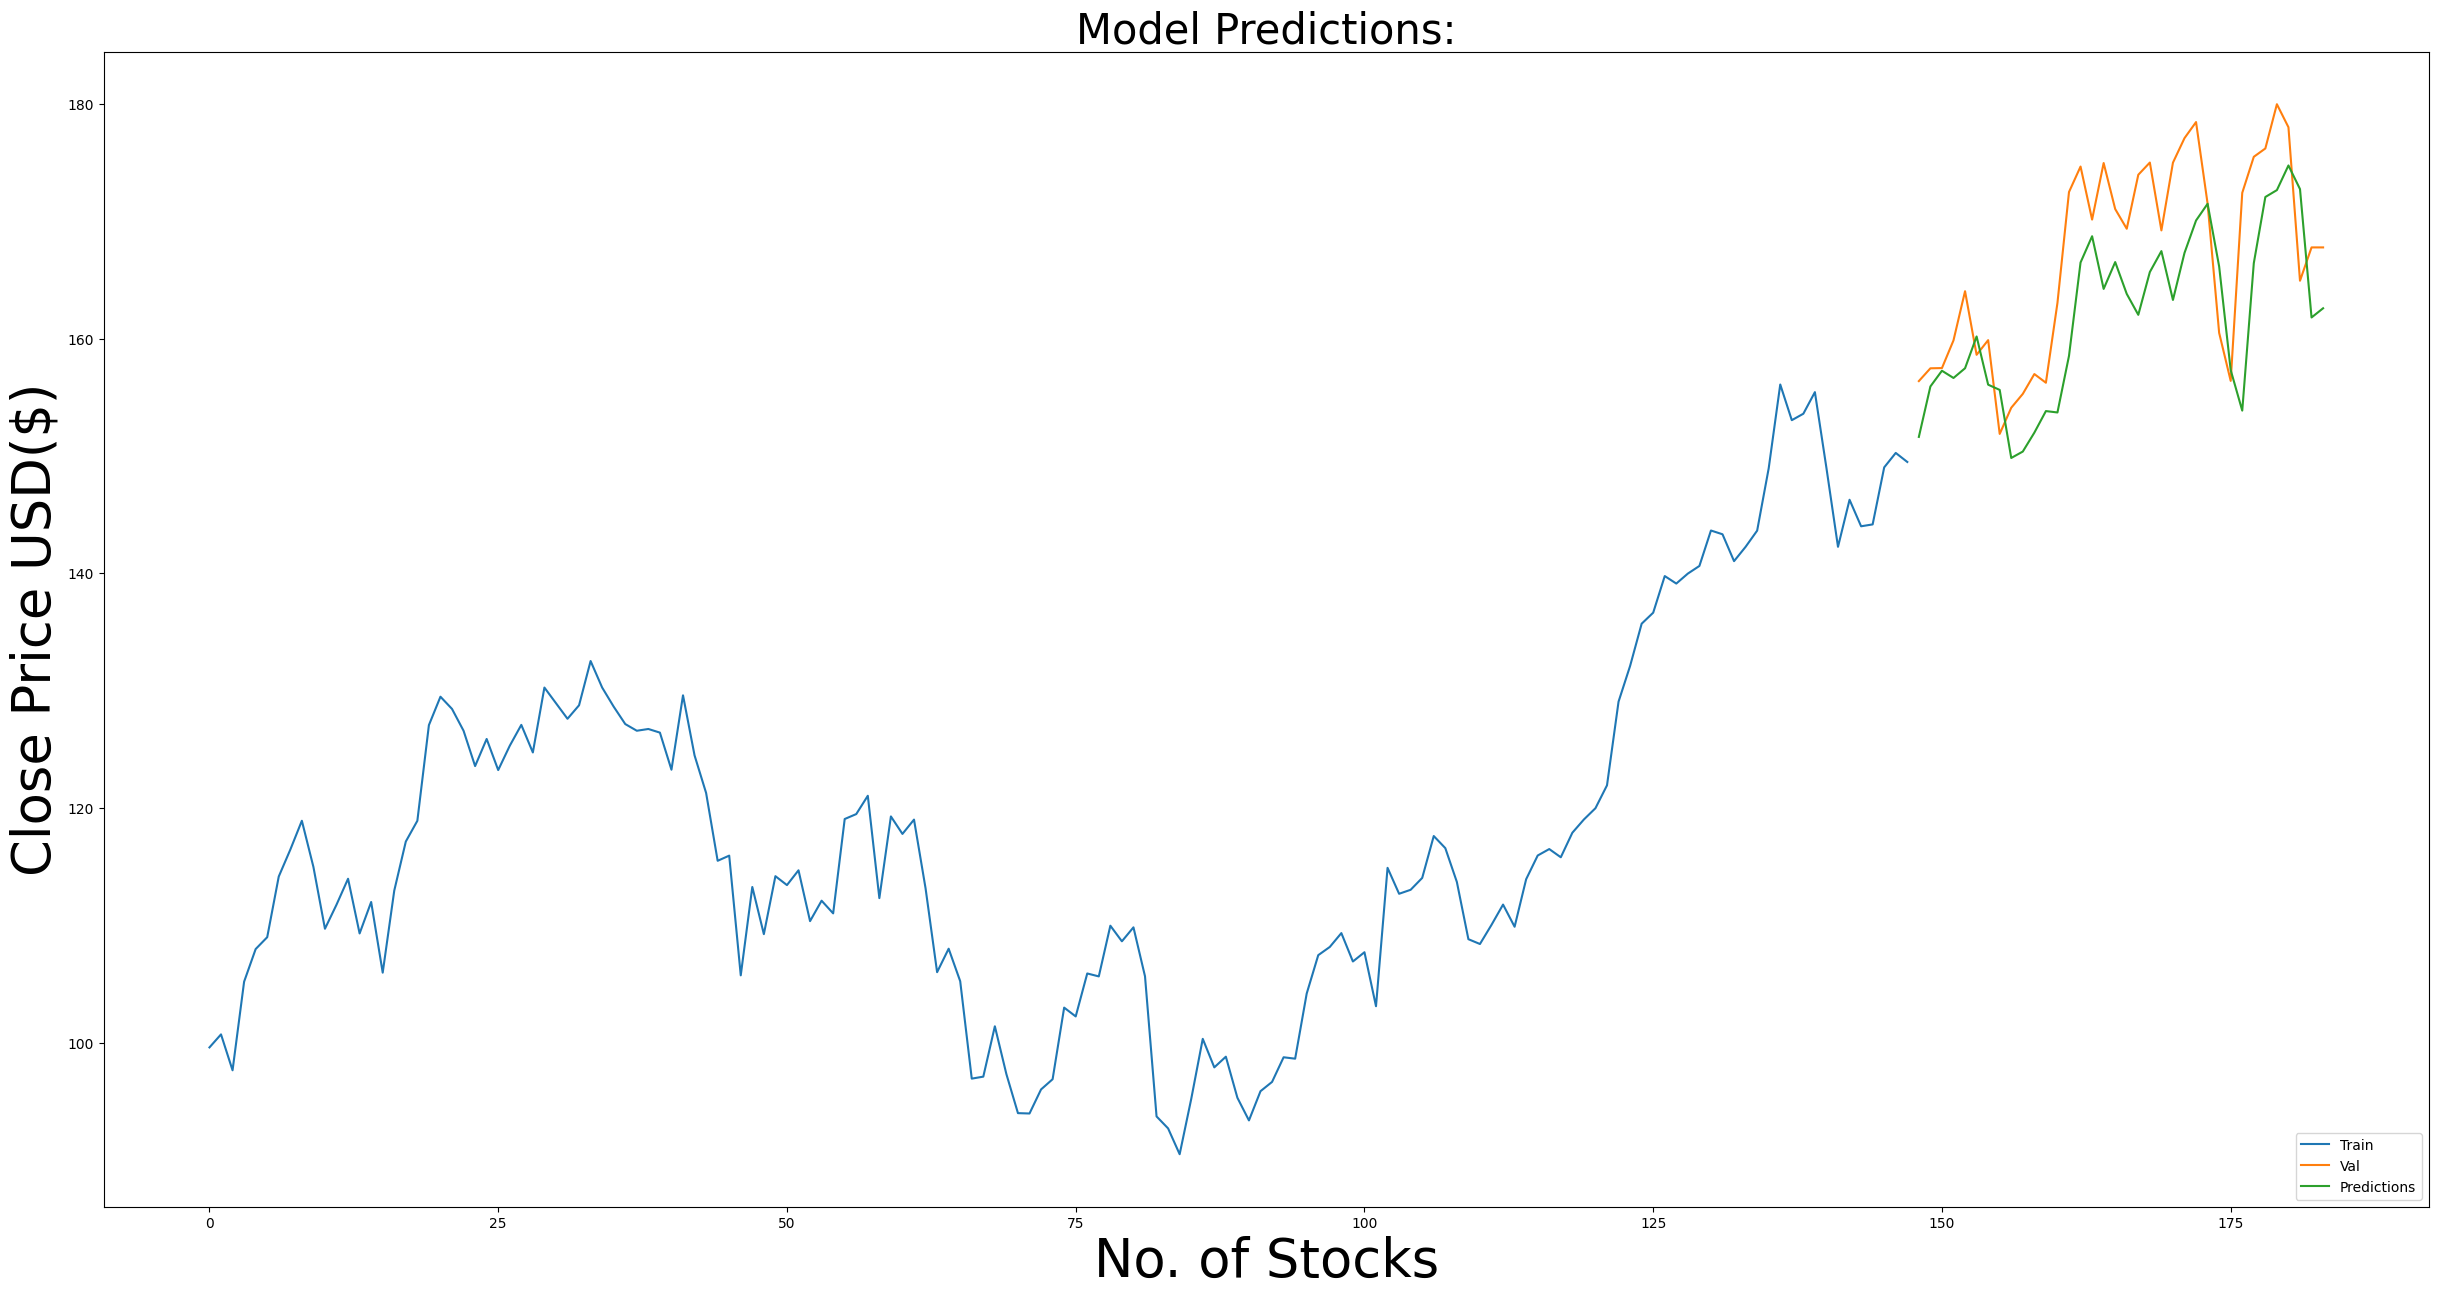

In [112]:
#plotting the data
train= data[:training_data_len]
valid= data[training_data_len:].copy() # To avoid overwritting the DF.
valid['Predictions']= predictions

#visualizing the data
plt.figure(figsize=(30,15))
plt.title('Model Predictions:', fontsize=30)
plt.xlabel('No. of Stocks',fontsize=38)
plt.ylabel('Close Price USD($)',fontsize=38)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [95]:
#showing the valid and predicted prices
valid

,Close,Predictions
148,156.389999,151.634720
149,157.479996,155.933304
150,157.500000,157.273148
151,159.860001,156.656342
152,164.050003,157.484634
153,158.630005,160.192322
154,159.880005,156.085388
155,151.889999,155.639694
156,154.119995,149.840775
157,155.300003,150.387115
